In [1]:
%matplotlib inline 
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
from scipy import stats

In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("LinearRegression.csv")

In [3]:
# Check top few records to get a feel of the data structure
df.head(50)

,Years of experience,Designation,Pay
0,3,1,389766
1,3,1,461384
2,3,1,350832
3,1,1,354735
4,3,1,382593
5,3,1,464375
6,3,1,324080
7,2,1,375247
8,2,1,427186
9,4,2,667277


In [4]:
#Lets analysze the distribution of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Years of experience,28.0,4.142857,1.799471,1.0,3.00,3.5,5.0,8.0
Designation,28.0,2.071429,0.978607,1.0,1.00,2.0,3.0,4.0
Pay,28.0,632966.392857,282289.059415,324080.0,420904.25,565050.0,710928.0,1320958.0


In [5]:
#understanding the datatypes
df.dtypes

Years of experience    int64
Designation            int64
Pay                    int64
dtype: object

In [6]:
#checking for any null values
df[df.isnull().any(axis=1)]

,Years of experience,Designation,Pay


In [7]:
# Getting The five-number summary
df.describe()

,Years of experience,Designation,Pay
count,28.000000,28.000000,2.800000e+01
mean,4.142857,2.071429,6.329664e+05
std,1.799471,0.978607,2.822891e+05
min,1.000000,1.000000,3.240800e+05
25%,3.000000,1.000000,4.209042e+05
50%,3.500000,2.000000,5.650500e+05
75%,5.000000,3.000000,7.109280e+05
max,8.000000,4.000000,1.320958e+06


In [8]:
#Median salary for each designation
df.groupby('Designation')['Pay'].median()

Designation
1     382593.0
2     573860.0
3     836907.0
4    1317731.0
Name: Pay, dtype: float64

array([[<AxesSubplot:title={'center':'Years of experience'}>,
        <AxesSubplot:title={'center':'Designation'}>],
       [<AxesSubplot:title={'center':'Pay'}>, <AxesSubplot:>]],
      dtype=object)

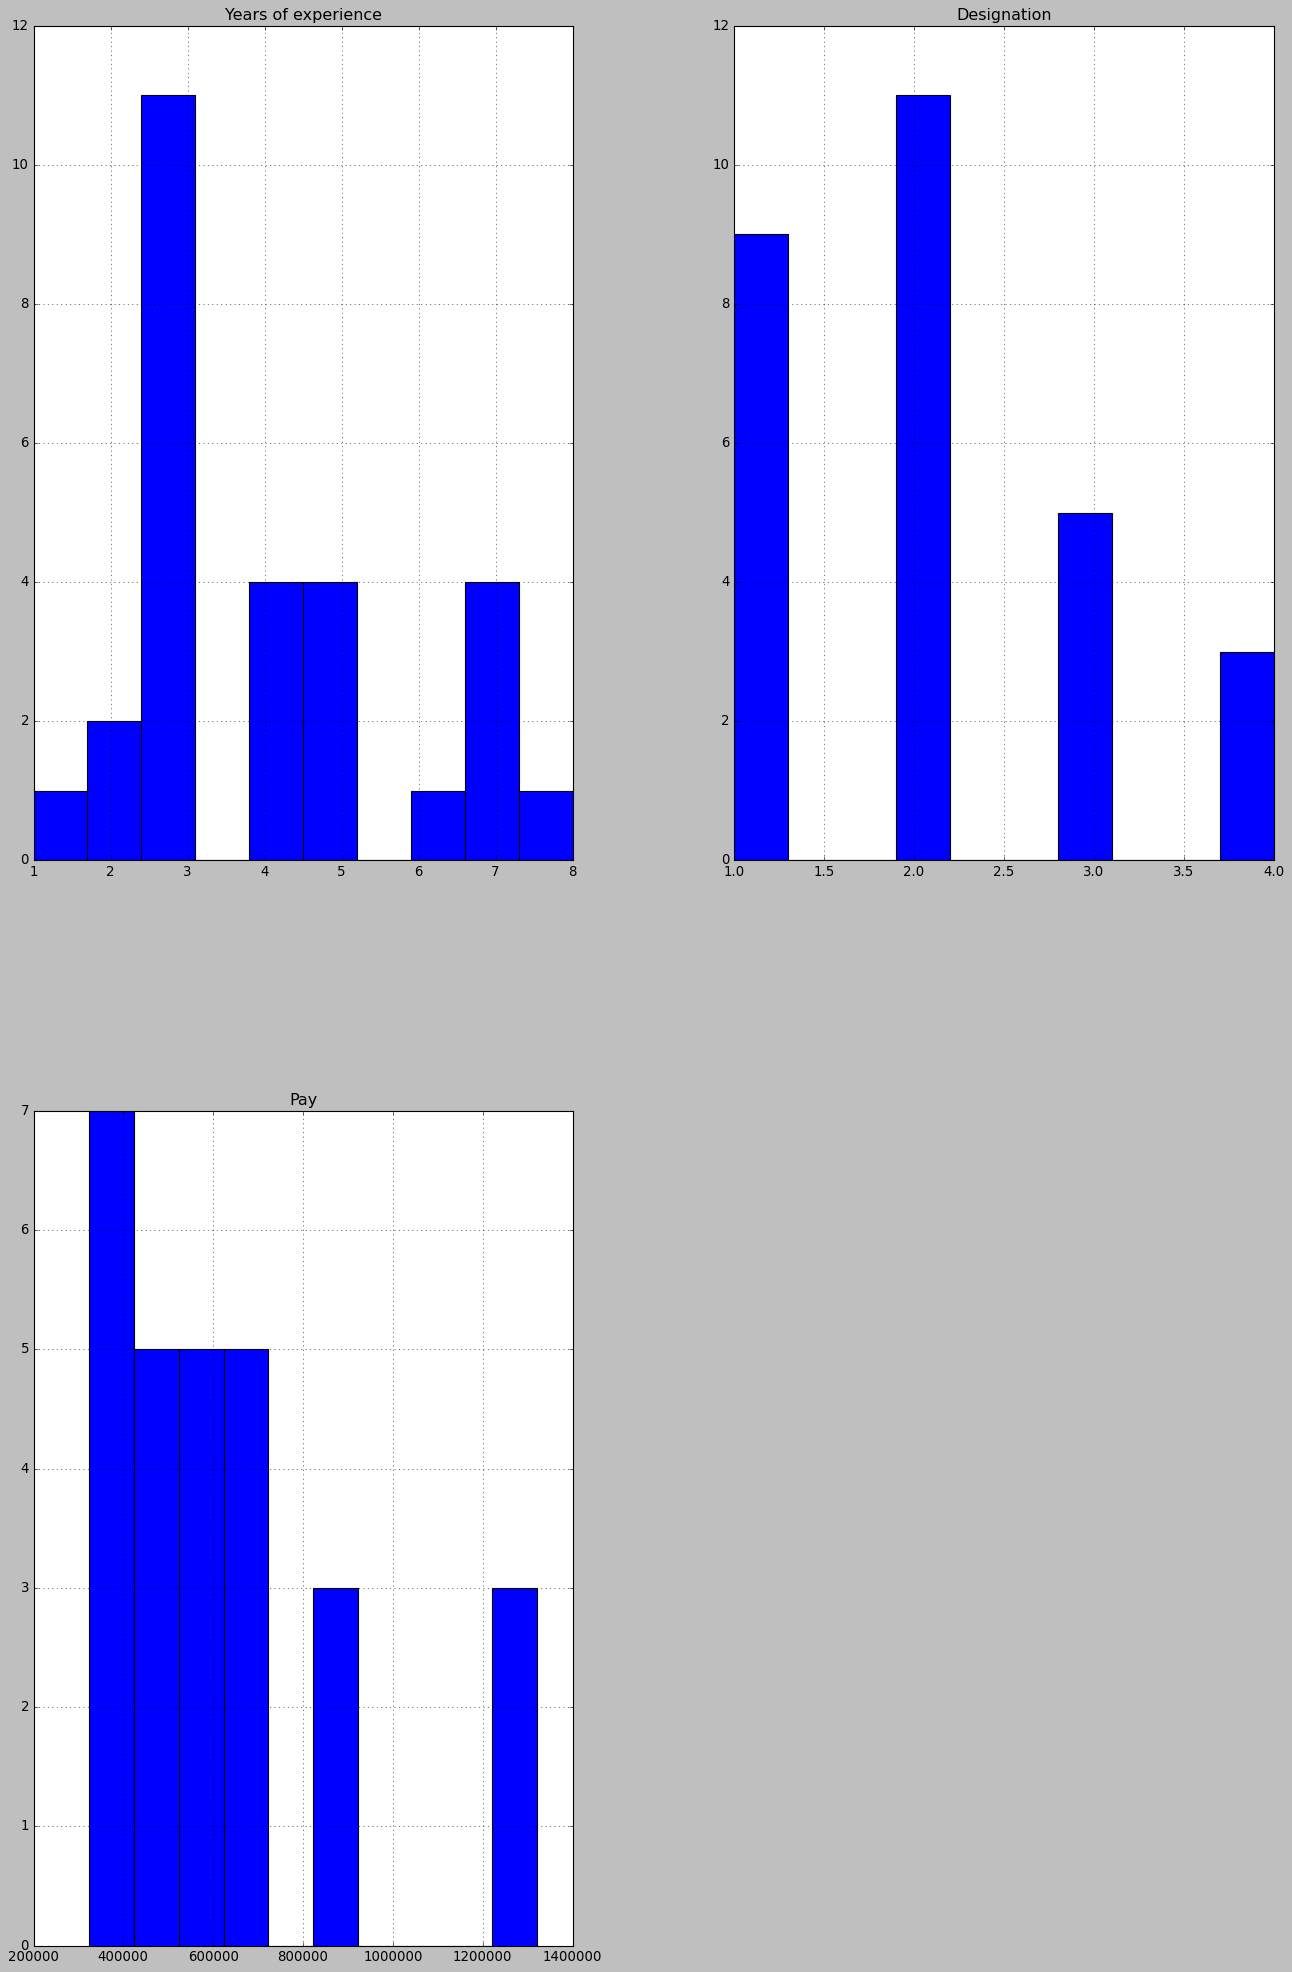

In [9]:
#viewing the data in histograms
df.hist(figsize = (20,30))

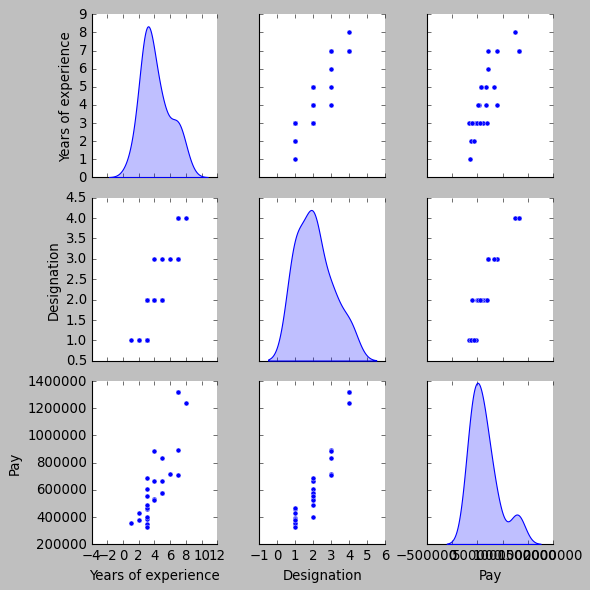

In [10]:
sns.pairplot(df, diag_kind='kde')   # to plot density curve instead of histogram

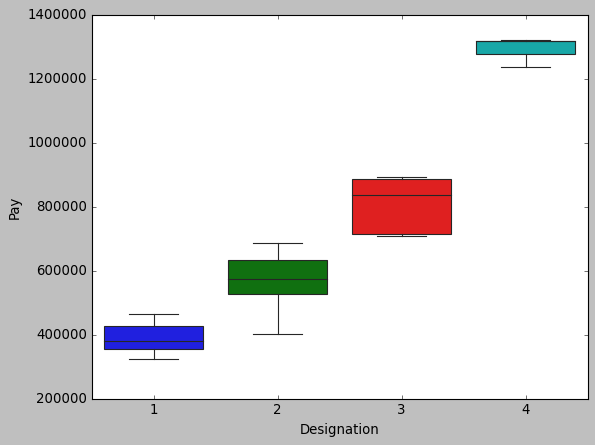

In [11]:
fig = sns.boxplot(x='Designation', y="Pay", data=df)

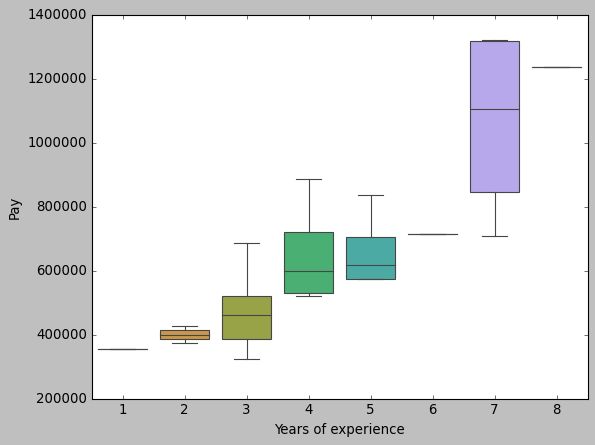

In [12]:
fig = sns.boxplot(x='Years of experience', y="Pay", data=df)

<AxesSubplot:>

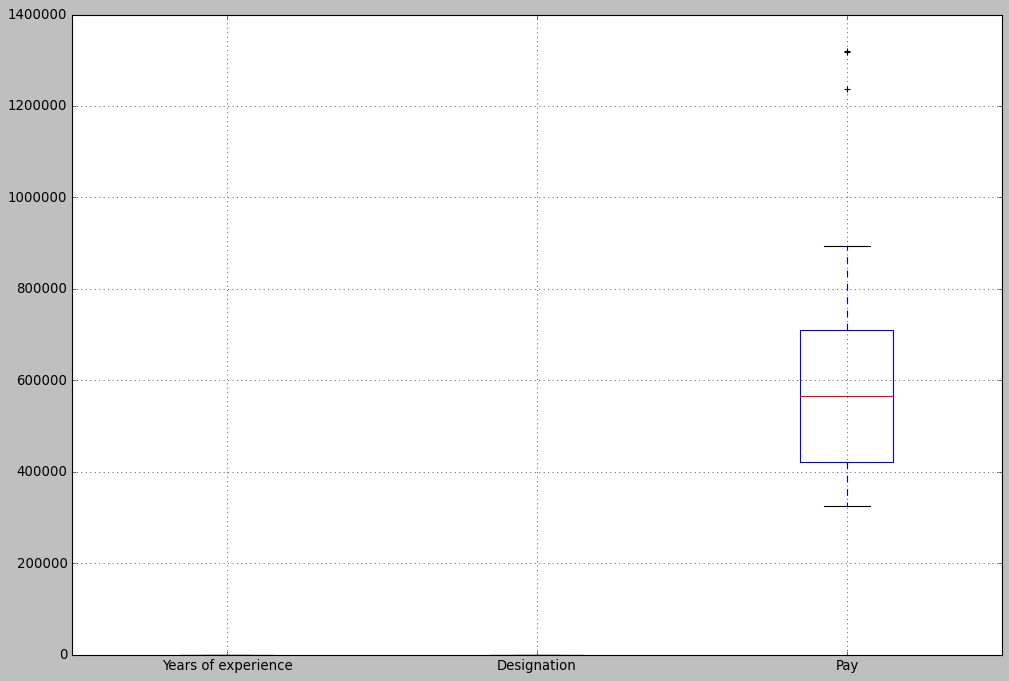

In [13]:
df.boxplot(figsize=(15, 10))

<AxesSubplot:>

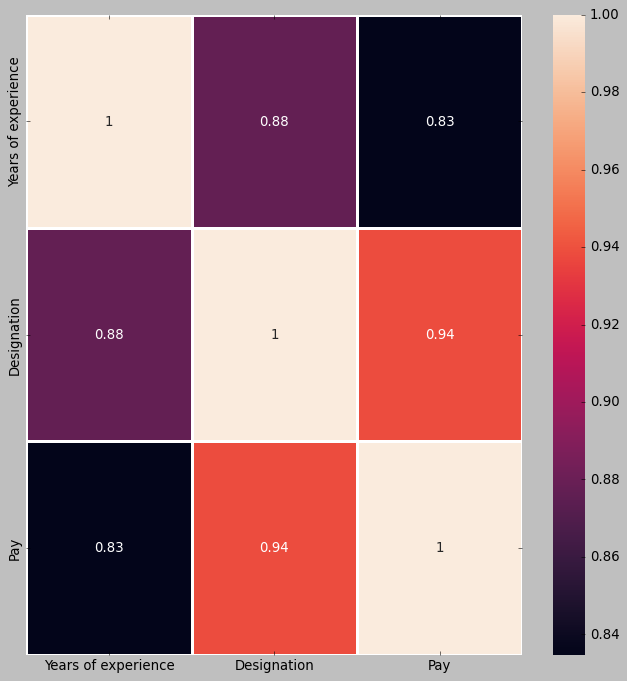

In [14]:
#Correlation

import matplotlib.pylab as plt
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, linewidths=1)

In [15]:
# Copy all the predictor variables into X dataframe
X = df.drop('Pay', axis=1)

# Copy the 'Pay' column alone into the y dataframe. This is the dependent variable
y = df[['Pay']]

In [16]:
# Split X and y into training and test set in 75:25 ratio

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [17]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Exploring the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Years of experience is 34592.12769650382
The coefficient for Designation is 241702.78477560135


In [19]:
# checking the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 27579.230845524464


In [20]:
regression_model.score(X_train, y_train)

0.9355819227610723

In [ ]:
# So the model explains 93.5% of the variability in Y using X